# Dataset Exploration

We have two datasets attributes and standard_names with below columns
1. attributes - analysis , Attribute name
2. standard_names - Analysis, Attribute, Standard names

Our goal is to compare the analysis , Attribute columns of attributes dataset with the analysis , Attribute columns of standard names and map each entry of the attributes data to one of the standard name if not provide possible list of standard names.

### Standard names
![image.png](attachment:image.png)

### Attributes dataset
![image-4.png](attachment:image-4.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df1 = pd.read_excel('standard_names.xlsx')
print(df1.isna().sum())
df1.head()


Analysis          0
Attribute         0
Standard names    0
dtype: int64


,Analysis,Attribute,Standard names
0,CE-SDS (Non-Reduced),HHL,CE-SDS (Non-Reduced) HHL
1,CE-SDS (Non-Reduced),Purity,CE-SDS (Non-Reduced) Purity
2,CE-SDS (Reduced),Purity,CE-SDS (Reduced) Purity
3,SDS-PAGE (Non-Reduced),Purity,SDS-PAGE (Non-Reduced) Purity
4,SDS-PAGE (Reduced),Purity,SDS-PAGE (Reduced) Purity


In [164]:
df1 = df1.apply(lambda x: x.str.upper() if x.dtype == 'object' else x)
df1

,Analysis,Attribute,Standard names
0,CE-SDS (NON-REDUCED),HHL,CE-SDS (NON-REDUCED) HHL
1,CE-SDS (NON-REDUCED),PURITY,CE-SDS (NON-REDUCED) PURITY
2,CE-SDS (REDUCED),PURITY,CE-SDS (REDUCED) PURITY
3,SDS-PAGE (NON-REDUCED),PURITY,SDS-PAGE (NON-REDUCED) PURITY
4,SDS-PAGE (REDUCED),PURITY,SDS-PAGE (REDUCED) PURITY
5,RP-HPLC,PURITY (MAIN PEAK),RP-HPLC PURITY
6,IEF,ACIDIC PEAKS,IEF ACIDIC PEAKS
7,IEF,BASIC PEAKS,IEF BASIC PEAKS
8,IEF,MAIN PEAK,IEF MAIN PEAK
9,ICIEF,ACIDIC PEAKS,ICIEF ACIDIC PEAKS


df1 = df1.apply(lambda x: x.str.upper().str.strip() if x.dtype == 'object' else x)
df1

In [98]:
# Step 1: Drop rows with indices 24, 25, 27
df1 = df1.drop([24, 25, 27], axis=0)

# Step 2: Define the new rows to be added
new_rows = [
    ['HIAC', 'PARTICULATE-MATTER >= 10-UM', 'PARTICULATE-MATTER >= 10-UM'],
    ['UV', 'PARTICULATE-MATTER >= 10-UM', 'PARTICULATE-MATTER >= 10-UM'],
    ['HIAC', 'PARTICULATE-MATTER >= 25-UM', 'PARTICULATE-MATTER >= 25-UM'],
    ['UV', 'PARTICULATE-MATTER >= 25-UM', 'PARTICULATE-MATTER >= 25-UM'],
    ['ELISA', 'BINDING ACTIVITY', 'POTENCY BY BINDING ELISA'],
    ['ELISA', 'POTENCY', 'POTENCY BY BINDING ELISA']
]

# Step 3: Convert the new rows into a DataFrame
import pandas as pd
new_rows_df = pd.DataFrame(new_rows, columns=df1.columns)

# Step 4: Use pd.concat to append new rows to df1
df1 = pd.concat([df1, new_rows_df], ignore_index=True)


# Display the updated DataFrame
df1

,Analysis,Attribute,Standard names
0,CE-SDS (NON-REDUCED),HHL,CE-SDS (NON-REDUCED) HHL
1,CE-SDS (NON-REDUCED),PURITY,CE-SDS (NON-REDUCED) PURITY
2,CE-SDS (REDUCED),PURITY,CE-SDS (REDUCED) PURITY
3,SDS-PAGE (NON-REDUCED),PURITY,SDS-PAGE (NON-REDUCED) PURITY
4,SDS-PAGE (REDUCED),PURITY,SDS-PAGE (REDUCED) PURITY
5,RP-HPLC,PURITY (MAIN PEAK),RP-HPLC PURITY
6,IEF,ACIDIC PEAKS,IEF ACIDIC PEAKS
7,IEF,BASIC PEAKS,IEF BASIC PEAKS
8,IEF,MAIN PEAK,IEF MAIN PEAK
9,ICIEF,ACIDIC PEAKS,ICIEF ACIDIC PEAKS


In [ ]:
['HIAC','PARTICULATE-MATTER >= 10-UM','PARTICULATE-MATTER >= 10-UM']
['UV','PARTICULATE-MATTER >= 10-UM','PARTICULATE-MATTER >= 10-UM']
['HIAC','PARTICULATE-MATTER >= 25-UM','PARTICULATE-MATTER >= 25-UM']
['UV','PARTICULATE-MATTER >= 25-UM','PARTICULATE-MATTER >= 25-UM']
['ELISA','BINDING ACTIVITY','POTENCY BY BINDING ELISA']
['ELISA','POTENCY','POTENCY BY BINDING ELISA']


In [165]:
df2 = pd.read_excel('attributes.xlsx')
print(df2.isna().sum())
df2.head()

analysis          0
Attribute_name    4
dtype: int64


,analysis,Attribute_name
0,D_250475,IL2 INHIBITION ASSAY
1,D_95007196,PH
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED)
3,Y_SM_95011468_R,BIOASSAY
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN


In [166]:
df2.duplicated().sum()

0

In [167]:
df2 = df2.apply(lambda x: x.str.upper() if x.dtype == 'object' else x)
df2.head(10)

,analysis,Attribute_name
0,D_250475,IL2 INHIBITION ASSAY
1,D_95007196,PH
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED)
3,Y_SM_95011468_R,BIOASSAY
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN
5,250580_TOTAL_PROT,PAAD
6,250580_TOTAL_PROT,SAMPLE 1 MASS
7,250684_CE_SDS_REDUC,SS RM 3 PURITY HC AND LC PEAKS
8,250683_CE_SDS_NON_RE,MAIN PEAK
9,Y_SM_95007441_R,B7 BINDING SPR


df2 = df2.apply(lambda x: x.str.upper().str.strip() if x.dtype == 'object' else x)
df2.head(10)

In [168]:
#lets drop rows with empty column values for now
df2.dropna(inplace=True)

In [169]:
df1.shape, df2.shape

((32, 3), (7623, 2))

In [170]:
df2['std_match']=None

In [171]:
df2['att_match']=None

In [172]:
df2['ana_match']= None

In [173]:
df2['analysis'].astype(str).apply(len).max()

30

### trying to match df2_attribute_name by searching exact df1_standard_names, df1_attributes

In [174]:
# attributes list from df1
att_list = df1['Attribute'].unique()
att_list = [string.upper() for string in att_list]
att_list

['HHL',
 'PURITY',
 'PURITY (MAIN PEAK)',
 'ACIDIC PEAKS',
 'BASIC PEAKS',
 'MAIN PEAK',
 'HMW',
 'LMW',
 'MONOMER',
 'PARTICULATE-MATTER >= 10-UM',
 'PARTICULATE-MATTER >= 25-UM',
 'POTENCY',
 'BINDING ACTIVITY OR POTENCY',
 'BINDING ACTIVITY',
 'PH',
 'PROTEIN CONCENTRATION',
 'POLYSORBATE 80']

In [175]:
df2['analysis']

0                  D_250475
1                D_95007196
2               D_M00003744
3           Y_SM_95011468_R
4       250684_CE_SDS_REDUC
               ...         
7725                 CE_SDS
7726                 CE_SDS
7727                 CE_SDS
7728               CE_SDS_2
7729                  ICIEF
Name: analysis, Length: 7623, dtype: object

In [176]:
df1['Standard names']

0           CE-SDS (NON-REDUCED) HHL
1        CE-SDS (NON-REDUCED) PURITY
2            CE-SDS (REDUCED) PURITY
3      SDS-PAGE (NON-REDUCED) PURITY
4          SDS-PAGE (REDUCED) PURITY
5                     RP-HPLC PURITY
6                   IEF ACIDIC PEAKS
7                    IEF BASIC PEAKS
8                      IEF MAIN PEAK
9                 ICIEF ACIDIC PEAKS
10                 ICIEF BASIC PEAKS
11                   ICIEF MAIN PEAK
12                  CEX ACIDIC PEAKS
13                   CEX BASIC PEAKS
14                     CEX MAIN PEAK
15                  AEX ACIDIC PEAKS
16                   AEX BASIC PEAKS
17                     AEX MAIN PEAK
18                       SE-HPLC HMW
19                       SE-HPLC LMW
20                   SE-HPLC MONOMER
21                       SE-UPLC HMW
22                       SE-UPLC LMW
23                   SE-UPLC MONOMER
24       PARTICULATE-MATTER >= 10-UM
25       PARTICULATE-MATTER >= 25-UM
26    POTENCY BY CELL-BASED BIOASSAY
2

In [177]:
# standard names list from df1
std_list = df1['Standard names'].unique()
std_list = [string.upper() for string in std_list]
std_list

['CE-SDS (NON-REDUCED) HHL',
 'CE-SDS (NON-REDUCED) PURITY',
 'CE-SDS (REDUCED) PURITY',
 'SDS-PAGE (NON-REDUCED) PURITY',
 'SDS-PAGE (REDUCED) PURITY',
 'RP-HPLC PURITY',
 'IEF ACIDIC PEAKS',
 'IEF BASIC PEAKS',
 'IEF MAIN PEAK',
 'ICIEF ACIDIC PEAKS',
 'ICIEF BASIC PEAKS',
 'ICIEF MAIN PEAK',
 'CEX ACIDIC PEAKS',
 'CEX BASIC PEAKS',
 'CEX MAIN PEAK',
 'AEX ACIDIC PEAKS',
 'AEX BASIC PEAKS',
 'AEX MAIN PEAK',
 'SE-HPLC HMW',
 'SE-HPLC LMW',
 'SE-HPLC MONOMER',
 'SE-UPLC HMW',
 'SE-UPLC LMW',
 'SE-UPLC MONOMER',
 'PARTICULATE-MATTER >= 10-UM',
 'PARTICULATE-MATTER >= 25-UM',
 'POTENCY BY CELL-BASED BIOASSAY',
 'POTENCY BY BINDING ELISA',
 'SPR BINDING ACTIVITY',
 'PH',
 'PROTEIN CONCENTRATION (A280)',
 'POLYSORBATE 80']

In [178]:
ana_list = df1['Analysis'].unique()
ana_list = [string.upper().strip() for string in ana_list]
ana_list

['CE-SDS (NON-REDUCED)',
 'CE-SDS (REDUCED)',
 'SDS-PAGE (NON-REDUCED)',
 'SDS-PAGE (REDUCED)',
 'RP-HPLC',
 'IEF',
 'ICIEF',
 'CEX',
 'AEX',
 'SE-HPLC',
 'SE-UPLC',
 'HIAC OR UV',
 'CELL-BASED BIOASSAY',
 'ELISA',
 'SPR/BIOCORE',
 'PH',
 'A280',
 'POLYSORBATE 80']

In [179]:
import re

In [180]:
df2

,analysis,Attribute_name,std_match,att_match,ana_match
0,D_250475,IL2 INHIBITION ASSAY,None,None,None
1,D_95007196,PH,None,None,None
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED),None,None,None
3,Y_SM_95011468_R,BIOASSAY,None,None,None
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN,None,None,None
...,...,...,...,...,...
7725,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7726,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7727,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7728,CE_SDS_2,CE-SDS (NON-REDUCED) RRT OF UNKNOWN MINOR PEAKS,None,None,None


In [181]:
# attribute list from df1
res_counts ={}
for string in att_list:
    contains_string = df2['Attribute_name'].str.contains(re.escape(string),na=False)
    df2.loc[contains_string, 'att_match'] = string 
    res_counts[string]=contains_string.sum()
print(pd.DataFrame(list(res_counts.items()), columns=['Attribute_name', 'Count']))
print(sum(res_counts.values()))

                 Attribute_name  Count
0                           HHL     41
1                        PURITY    363
2            PURITY (MAIN PEAK)      6
3                  ACIDIC PEAKS     66
4                   BASIC PEAKS     60
5                     MAIN PEAK    237
6                           HMW    157
7                           LMW    164
8                       MONOMER    114
9   PARTICULATE-MATTER >= 10-UM      0
10  PARTICULATE-MATTER >= 25-UM      0
11                      POTENCY    159
12  BINDING ACTIVITY OR POTENCY      0
13             BINDING ACTIVITY     31
14                           PH     95
15        PROTEIN CONCENTRATION    111
16               POLYSORBATE 80     12
1616


In [182]:
# standard_names list from df1
res_counts ={}
for string in std_list:
    contains_string = df2['Attribute_name'].str.contains(re.escape(string),na=False)
    df2.loc[contains_string, 'std_match'] = string 
    res_counts[string]=contains_string.sum()

print(pd.DataFrame(list(res_counts.items()), columns=['standard_name', 'Count']))
print(sum(res_counts.values()))

                     standard_name  Count
0         CE-SDS (NON-REDUCED) HHL     14
1      CE-SDS (NON-REDUCED) PURITY     10
2          CE-SDS (REDUCED) PURITY     18
3    SDS-PAGE (NON-REDUCED) PURITY     38
4        SDS-PAGE (REDUCED) PURITY     35
5                   RP-HPLC PURITY      3
6                 IEF ACIDIC PEAKS     26
7                  IEF BASIC PEAKS     22
8                    IEF MAIN PEAK     56
9               ICIEF ACIDIC PEAKS     22
10               ICIEF BASIC PEAKS     18
11                 ICIEF MAIN PEAK     53
12                CEX ACIDIC PEAKS      3
13                 CEX BASIC PEAKS      3
14                   CEX MAIN PEAK      9
15                AEX ACIDIC PEAKS      0
16                 AEX BASIC PEAKS      0
17                   AEX MAIN PEAK      4
18                     SE-HPLC HMW      9
19                     SE-HPLC LMW     10
20                 SE-HPLC MONOMER      7
21                     SE-UPLC HMW      3
22                     SE-UPLC LMW

In [183]:
# standard_names list from df1
res_counts ={}
for string in ana_list:
    contains_string = df2['Attribute_name'].str.contains(re.escape(string),na=False)
    df2.loc[contains_string, 'ana_match'] = string 
    res_counts[string]=contains_string.sum()

print(pd.DataFrame(list(res_counts.items()), columns=['Analysis', 'Count']))
print(sum(res_counts.values()))

                  Analysis  Count
0     CE-SDS (NON-REDUCED)    957
1         CE-SDS (REDUCED)    985
2   SDS-PAGE (NON-REDUCED)     98
3       SDS-PAGE (REDUCED)    118
4                  RP-HPLC     29
5                      IEF    320
6                    ICIEF    291
7                      CEX    103
8                      AEX     25
9                  SE-HPLC     72
10                 SE-UPLC     35
11              HIAC OR UV      0
12     CELL-BASED BIOASSAY     23
13                   ELISA    130
14             SPR/BIOCORE      0
15                      PH     95
16                    A280     79
17          POLYSORBATE 80     12
3372


In [184]:
df2

,analysis,Attribute_name,std_match,att_match,ana_match
0,D_250475,IL2 INHIBITION ASSAY,None,None,None
1,D_95007196,PH,PH,PH,PH
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED),None,None,None
3,Y_SM_95011468_R,BIOASSAY,None,None,None
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN,None,None,None
...,...,...,...,...,...
7725,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7726,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7727,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None
7728,CE_SDS_2,CE-SDS (NON-REDUCED) RRT OF UNKNOWN MINOR PEAKS,None,None,CE-SDS (NON-REDUCED)


#### Co-occurance of attributes in attribute_name

In [185]:
from itertools import combinations
df = df2.copy()
# Initialize the co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=att_list, columns=att_list)
# Count co-occurrences
for doc in df['Attribute_name']:
    # Create a set to hold the found words in the current document
    found_words = set()
    
    for word in att_list:
        # Use regex to find occurrences of the word (case insensitive)
        pattern = rf'\b{re.escape(word)}\b'
        if re.search(pattern, doc, re.IGNORECASE):
            found_words.add(word)

    # Update the co-occurrence matrix
    for word1, word2 in combinations(found_words, 2):
        co_occurrence_matrix.loc[word1, word2] += 1
        co_occurrence_matrix.loc[word2, word1] += 1  # Symmetric matrix
    
    # Count the occurrence of each individual word
    for word in found_words:
        co_occurrence_matrix.loc[word, word] += 1  # Count for the same word

# Display the co-occurrence matrix
co_occurrence_matrix


,HHL,PURITY,PURITY (MAIN PEAK),ACIDIC PEAKS,BASIC PEAKS,MAIN PEAK,HMW,LMW,MONOMER,PARTICULATE-MATTER >= 10-UM,PARTICULATE-MATTER >= 25-UM,POTENCY,BINDING ACTIVITY OR POTENCY,BINDING ACTIVITY,PH,PROTEIN CONCENTRATION,POLYSORBATE 80
HHL,40,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PURITY,3,349,0,0,0,16,0,0,5,0,0,1,0,0,0,0,0
PURITY (MAIN PEAK),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACIDIC PEAKS,0,0,0,63,0,0,0,0,0,0,0,0,0,0,0,0,0
BASIC PEAKS,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0
MAIN PEAK,0,16,0,0,0,206,0,0,0,0,0,0,0,0,0,0,0
HMW,0,0,0,0,0,0,147,0,0,0,0,0,0,0,0,0,0
LMW,0,0,0,0,0,0,0,154,0,0,0,0,0,0,0,0,0
MONOMER,0,5,0,0,0,0,0,0,111,0,0,0,0,0,0,0,0
PARTICULATE-MATTER >= 10-UM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
dict_from_df = {(row[0], row[1]): row[2] for row in df1.itertuples(index=False)}

In [187]:
dict_from_df

{('CE-SDS (NON-REDUCED) ', 'HHL'): 'CE-SDS (NON-REDUCED) HHL',
 ('CE-SDS (NON-REDUCED) ', 'PURITY'): 'CE-SDS (NON-REDUCED) PURITY',
 ('CE-SDS (REDUCED) ', 'PURITY'): 'CE-SDS (REDUCED) PURITY',
 ('SDS-PAGE (NON-REDUCED)', 'PURITY'): 'SDS-PAGE (NON-REDUCED) PURITY',
 ('SDS-PAGE (REDUCED)', 'PURITY'): 'SDS-PAGE (REDUCED) PURITY',
 ('RP-HPLC', 'PURITY (MAIN PEAK)'): 'RP-HPLC PURITY',
 ('IEF', 'ACIDIC PEAKS'): 'IEF ACIDIC PEAKS',
 ('IEF', 'BASIC PEAKS'): 'IEF BASIC PEAKS',
 ('IEF', 'MAIN PEAK'): 'IEF MAIN PEAK',
 ('ICIEF', 'ACIDIC PEAKS'): 'ICIEF ACIDIC PEAKS',
 ('ICIEF', 'BASIC PEAKS'): 'ICIEF BASIC PEAKS',
 ('ICIEF', 'MAIN PEAK'): 'ICIEF MAIN PEAK',
 ('CEX', 'ACIDIC PEAKS'): 'CEX ACIDIC PEAKS',
 ('CEX', 'BASIC PEAKS'): 'CEX BASIC PEAKS',
 ('CEX', 'MAIN PEAK'): 'CEX MAIN PEAK',
 ('AEX', 'ACIDIC PEAKS'): 'AEX ACIDIC PEAKS',
 ('AEX', 'BASIC PEAKS'): 'AEX BASIC PEAKS',
 ('AEX', 'MAIN PEAK'): 'AEX MAIN PEAK',
 ('SE-HPLC', 'HMW'): 'SE-HPLC HMW',
 ('SE-HPLC', 'LMW'): 'SE-HPLC LMW',
 ('SE-HPLC', 

In [188]:
from collections import defaultdict
# Function to check if key-value mapping is met in df2
def check_mapping(df2, dict_from_df):
    # Create a list to store results (True if mapping is met, False otherwise)
    results = []
    match_counts = defaultdict(int)
    for row in df2.itertuples(index=False):
        key = (row[4], row[3])  # Create a key from the first two columns
        if key in dict_from_df:  # Check if the key exists in the dictionary
            results.append(dict_from_df[key] == row[2])  # Check if the value matches
            match_counts[key] += 1 
        else:
            results.append(False)  # If key doesn't exist, mapping is not met
    
    return results,match_counts

# Call the function and get the result list
mapping_results,match_counts = check_mapping(df2, dict_from_df)

# Convert the results into a DataFrame column or analyze it
df2['mapping_met'] = mapping_results

In [189]:
match_counts

defaultdict(int,
            {('PH', 'PH'): 95,
             ('A280', 'PROTEIN CONCENTRATION'): 56,
             ('POLYSORBATE 80', 'POLYSORBATE 80'): 12,
             ('ICIEF', 'MAIN PEAK'): 74,
             ('ICIEF', 'ACIDIC PEAKS'): 40,
             ('CELL-BASED BIOASSAY', 'POTENCY'): 12,
             ('IEF', 'BASIC PEAKS'): 4,
             ('IEF', 'ACIDIC PEAKS'): 4,
             ('IEF', 'MAIN PEAK'): 3,
             ('SDS-PAGE (REDUCED)', 'PURITY'): 39,
             ('SDS-PAGE (NON-REDUCED)', 'PURITY'): 42,
             ('SE-HPLC', 'MONOMER'): 16,
             ('SE-HPLC', 'HMW'): 18,
             ('SE-HPLC', 'LMW'): 20,
             ('ICIEF', 'BASIC PEAKS'): 35,
             ('AEX', 'MAIN PEAK'): 7,
             ('SE-UPLC', 'LMW'): 9,
             ('SE-UPLC', 'HMW'): 10,
             ('SE-UPLC', 'MONOMER'): 4,
             ('CEX', 'MAIN PEAK'): 17,
             ('CEX', 'ACIDIC PEAKS'): 6,
             ('CEX', 'BASIC PEAKS'): 6,
             ('AEX', 'BASIC PEAKS'): 5,
             

In [139]:
match_counts

defaultdict(int,
            {('PH', 'PH'): 94,
             ('ELISA', 'POTENCY'): 51,
             ('POLYSORBATE 80', 'POLYSORBATE 80'): 12,
             ('ELISA', 'BINDING ACTIVITY'): 19,
             ('ICIEF', 'MAIN PEAK'): 74,
             ('ICIEF', 'ACIDIC PEAKS'): 40,
             ('IEF', 'BASIC PEAKS'): 4,
             ('IEF', 'ACIDIC PEAKS'): 4,
             ('IEF', 'MAIN PEAK'): 3,
             ('SDS-PAGE (REDUCED)', 'PURITY'): 39,
             ('SDS-PAGE (NON-REDUCED)', 'PURITY'): 42,
             ('CE-SDS (NON-REDUCED)', 'HHL'): 20,
             ('CE-SDS (NON-REDUCED)', 'PURITY'): 30,
             ('SE-HPLC', 'MONOMER'): 16,
             ('SE-HPLC', 'HMW'): 18,
             ('SE-HPLC', 'LMW'): 20,
             ('CE-SDS (REDUCED)', 'PURITY'): 28,
             ('ICIEF', 'BASIC PEAKS'): 35,
             ('AEX', 'MAIN PEAK'): 7,
             ('SE-UPLC', 'LMW'): 9,
             ('SE-UPLC', 'HMW'): 10,
             ('SE-UPLC', 'MONOMER'): 4,
             ('CEX', 'MAIN PEAK'): 17,


In [137]:
df2['mapping_met'].value_counts()

mapping_met
False    7246
True      377
Name: count, dtype: int64

In [123]:
df = df2[['analysis','Attribute_name','att_match','ana_match','std_match','mapping_met']]

### Matches in attribute_name

In [124]:
missing_combinations = df[df['mapping_met']==False].notnull()
combination_counts = missing_combinations.groupby([df.columns[2], df.columns[3], df.columns[4]]).size().reset_index(name='count')
combination_counts

,att_match,ana_match,std_match,count
0,False,False,False,3780
1,False,True,False,2384
2,True,False,False,716
3,True,True,False,358
4,True,True,True,8


In [125]:
missing_combinations = df[df['mapping_met']==True].notnull()
combination_counts = missing_combinations.groupby([df.columns[2], df.columns[3], df.columns[4]]).size().reset_index(name='count')
combination_counts

,att_match,ana_match,std_match,count
0,True,True,True,377


In [126]:
c = df2[(df2['mapping_met']==True) & (df2['att_match'].notna()) & (df2['ana_match'].notna()) & (df2['std_match'].notna())]
c = c.sort_values(by= 'std_match',ascending=True)
c

,analysis,Attribute_name,std_match,att_match,ana_match,mapping_met
6322,BIO_ICIEF,AEX MAIN PEAK,AEX MAIN PEAK,MAIN PEAK,AEX,True
2721,HPLC,AEX MAIN PEAK,AEX MAIN PEAK,MAIN PEAK,AEX,True
3730,ICIEF,AEX MAIN PEAK,AEX MAIN PEAK,MAIN PEAK,AEX,True
3937,ICIEF_2,AEX MAIN PEAK,AEX MAIN PEAK,MAIN PEAK,AEX,True
3564,CE_SDS_2,CE-SDS (NON-REDUCED) HHL,CE-SDS (NON-REDUCED) HHL,HHL,CE-SDS (NON-REDUCED),True
...,...,...,...,...,...,...
4585,BIO_SE-HPLC,SE-UPLC LMW SPECIES,SE-UPLC LMW,LMW,SE-UPLC,True
4594,SE_HPLC,SE-UPLC LMW SPECIES,SE-UPLC LMW,LMW,SE-UPLC,True
3019,BIO_SE-HPLC,SE-UPLC MONOMER,SE-UPLC MONOMER,MONOMER,SE-UPLC,True
5269,BIO_SE-HPLC,SE-UPLC MONOMER PEAK,SE-UPLC MONOMER,MONOMER,SE-UPLC,True


In [37]:
c.to_csv('map.csv',index = True)

In [127]:
# 4
df2[(df2['mapping_met']==False) & (df2['att_match'].notna()) & (df2['ana_match'].notna()) & (df2['std_match'].notna())]

,analysis,Attribute_name,std_match,att_match,ana_match,mapping_met
2024,CE_SDS_2,CE-SDS (NON-REDUCED) HHL PURITY,CE-SDS (NON-REDUCED) HHL,PURITY,CE-SDS (NON-REDUCED),False
2096,RP_HPLC_3,RP-HPLC PURITY,RP-HPLC PURITY,PURITY,RP-HPLC,False
2203,BIOASSAY,MICROSPHERE RELATIVE POTENCY,PH,POTENCY,PH,False
3591,CE_SDS,CE-SDS (NON-REDUCED) PURITY (MAIN PEAK),CE-SDS (NON-REDUCED) PURITY,MAIN PEAK,CE-SDS (NON-REDUCED),False
3819,HPLC,RP-HPLC PURITY (MAIN PEAK),RP-HPLC PURITY,MAIN PEAK,RP-HPLC,False
4412,CE_SDS_2,CE-SDS (REDUCED) PURITY (MAIN PEAK),CE-SDS (REDUCED) PURITY,MAIN PEAK,CE-SDS (REDUCED),False
5154,RP_HPLC,RP-HPLC PURITY (MAIN PEAK),RP-HPLC PURITY,MAIN PEAK,RP-HPLC,False
6136,CE_SDS,CE-SDS (NON-REDUCED) PURITY (MAIN PEAK),CE-SDS (NON-REDUCED) PURITY,MAIN PEAK,CE-SDS (NON-REDUCED),False


In [71]:
# 2
df2[(df2['att_match'].notna()) & (df2['ana_match'].isna()) & (df2['std_match'].isna())]

,analysis,Attribute_name,std_match,att_match,ana_match,mapping_met
7,250684_CE_SDS_REDUC,SS RM 3 PURITY HC AND LC PEAKS,None,PURITY,None,False
8,250683_CE_SDS_NON_RE,MAIN PEAK,None,MAIN PEAK,None,False
13,250657_SIZE_HOMOG,MONOMER,None,MONOMER,None,False
16,250657_SIZE_HOMOG,HMW,None,HMW,None,False
23,250657_SIZE_HOMOG,LMW,None,LMW,None,False
...,...,...,...,...,...,...
7688,BIO_SE-HPLC,SE HPLC HMW SPECIES,None,HMW,None,False
7690,BIO_SE-HPLC,SE HPLC LMW SPECIES,None,LMW,None,False
7692,CE_SDS_2,CGE(REDUCED) PURITY OF HEAVY AND LIGHT CHAIN P...,None,PURITY,None,False
7701,ICIEF,% MAIN PEAK,None,MAIN PEAK,None,False


In [40]:
# 3
c5 = df2[(df2['att_match'].notna()) & (df2['ana_match'].notna()) & (df2['std_match'].isna())]
c5 = c5.sort_values(by = 'ana_match',ascending=True)
c5.to_csv('map1.csv',index = True)

In [74]:
# 1
df2[(df2['att_match'].isna()) & (df2['ana_match'].notna()) & (df2['std_match'].isna())]

,analysis,Attribute_name,std_match,att_match,ana_match,mapping_met
118,Y_USPO12120_BDA,ACTIVITY BINDING ELISA,None,None,ELISA,False
170,R_OPDIVOINY_POTELISA,POTENCIA POR ELISA,None,None,ELISA,False
180,P_M16133,BINDING ELISA,None,None,ELISA,False
188,P_M20645,RESIDUAL PROTEIN A ELISA,None,None,ELISA,False
192,Y_SM_250658_R,RM CEX PEAK 4,None,None,CEX,False
...,...,...,...,...,...,...
7710,CE_SDS,CE-SDS (NON-REDUCED) UNKNOWN MINOR PEAK >= QL 6,None,None,CE-SDS (NON-REDUCED),False
7714,CE_SDS_2,CE-SDS (REDUCED) RRT OF UNKNOWN MINOR PEAK >=L...,None,None,CE-SDS (REDUCED),False
7715,ISOELECTRIC_FOCUSING_2,IEF BANDS,None,None,IEF,False
7719,CE_SDS_2,CE-SDS (NON-REDUCED) UNKNOWN MINOR PEAKS >LOQ,None,None,CE-SDS (NON-REDUCED),False


In [69]:
# 0
df2[(df2['att_match'].isna()) & (df2['ana_match'].isna()) & (df2['std_match'].isna())]

,analysis,Attribute_name,std_match,att_match,ana_match,mapping_met
0,D_250475,IL2 INHIBITION ASSAY,None,None,None,False
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED),None,None,None,False
3,Y_SM_95011468_R,BIOASSAY,None,None,None,False
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN,None,None,None,False
5,250580_TOTAL_PROT,PAAD,None,None,None,False
...,...,...,...,...,...,...
7724,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None,False
7725,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None,False
7726,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None,False
7727,CE_SDS,CE-SDS (RED.) REL. RETENTION TIME: UNDEFINED P...,None,None,None,False


### Overall results for direct matches

tried checking for direct matches of analysis and attribute names of standard names dataset in the attribute_name column of the attributes dataset

1. Out of 7730 only 407 had direct matches for both attribute and analysis through which they can be mapped to one of the standard names.
2. There are 384 entries that have matches for their attribute and analysis names which will be helpful to map them to standard names.
3. Nearly 3923(half of the dataset) do not have exact forms of analysis and attribute names, this is where using LLM models will come in handy.

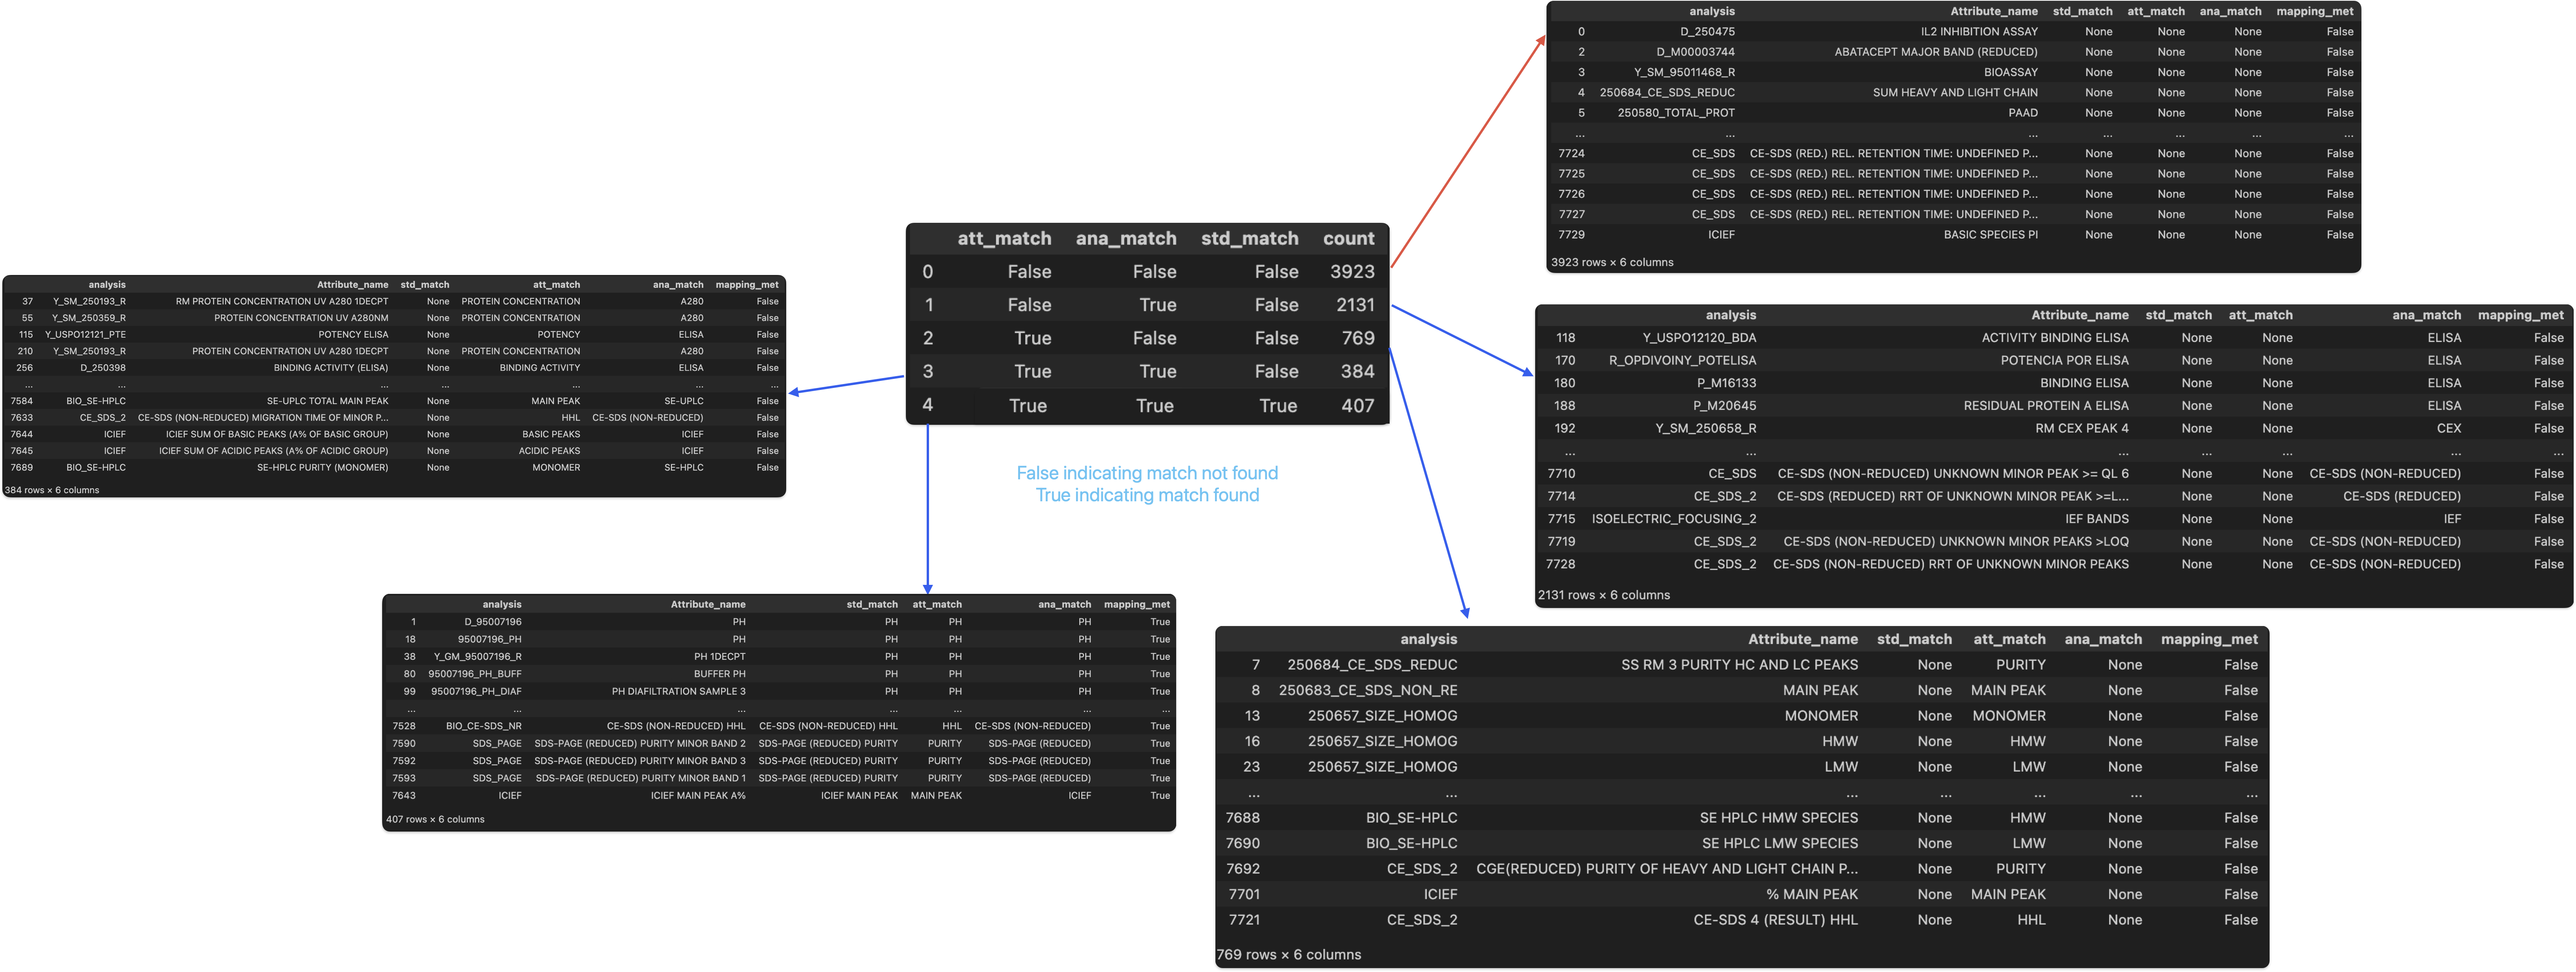